# MinorProject-4
## Support Vector Machines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
%matplotlib inline

In [ ]:
X, y = datasets.make_blobs(n_samples= 50, centers= 2, n_features= 2, cluster_std= 1.05, random_state= 10)

y = np.where(y == 0, -1, 1)
y

In [ ]:
X.shape

In [ ]:
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,iters=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iters = iters
        self.w = None
        self.b = None
        
    def fit(self,x,y):
        y=np.where(y<= 0,-1,1)
        n_samples,n_features =x.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        for i in range(self.iters):
            for idx,x_i in enumerate(x):
                condition = y[idx] * (np.dot(x_i,self.w) - self.b)>=1
                if condition:
                    self.w -= self.lr * (2* self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2* self.lambda_param * self.w - np.dot(x_i,y[idx]))
                    self.b -= self.lr * y[idx]
                
    def predict(self,x):
        linear_out = np.dot(x,self.w) - self.b
        return np.sign(linear_out)

In [19]:
clf = svm.SVC(kernel= 'linear')
clf.fit(X, y)

SVC(kernel='linear')

In [25]:
print(clf.coef_)

[[-0.04131594  0.19096971]]


In [26]:
clf_1 = SVM()
clf_1.fit(X, y)

In [28]:
print(clf_1.w, clf_1.b)

[0.01507799 0.21286664] -0.3850000000000003


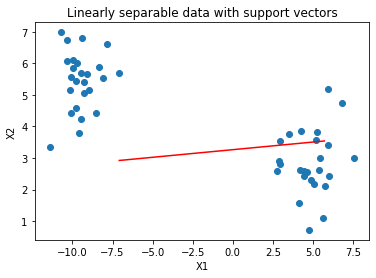

In [29]:
support_vectors = clf.support_vectors_
plt.scatter(X[:, 1], X[:, 0])
plt.plot(support_vectors[0][:], support_vectors[1][:], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

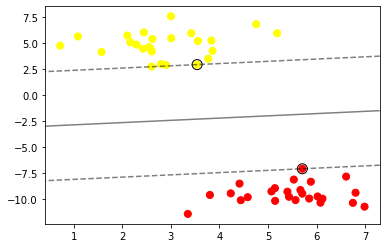

In [30]:
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()